In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

#Task 2. Load the dataset into the tool.

In [ ]:
data = pd.read_csv('/content/penguins_size.csv')
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [ ]:
data['sex'].value_counts()

MALE      168
FEMALE    165
.           1
Name: sex, dtype: int64

In [ ]:
data['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

#Task 3.Univariate Analysis

<Axes: >

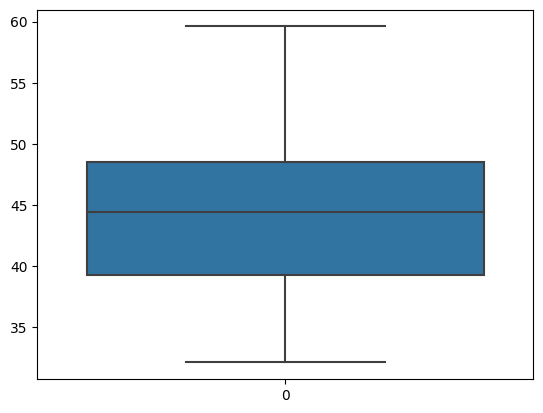

In [ ]:
sns.boxplot(data['culmen_length_mm'])

<Axes: >

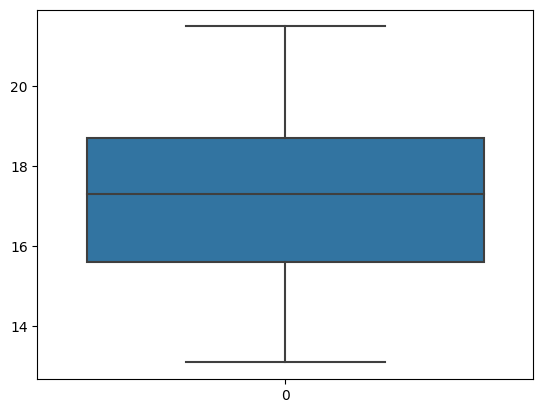

In [ ]:
sns.boxplot(data['culmen_depth_mm'])

<Axes: >

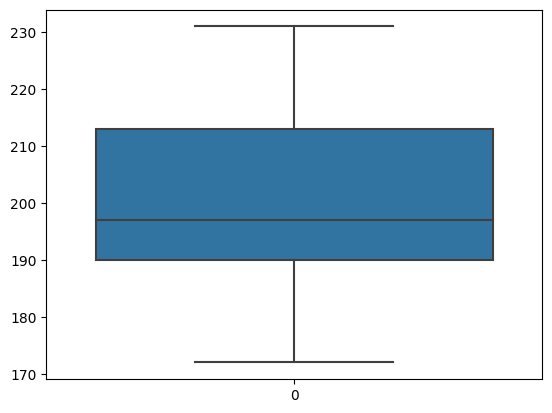

In [ ]:
sns.boxplot(data['flipper_length_mm'])

<Axes: >

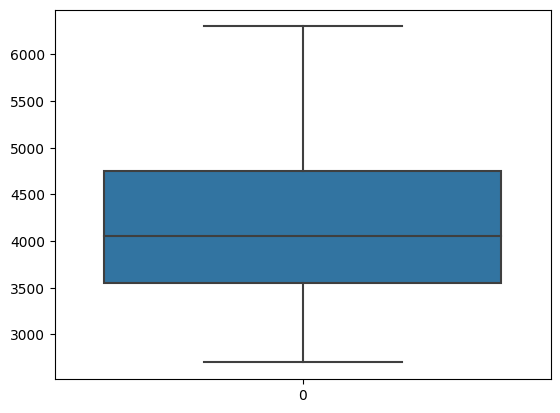

In [ ]:
sns.boxplot(data['body_mass_g'])

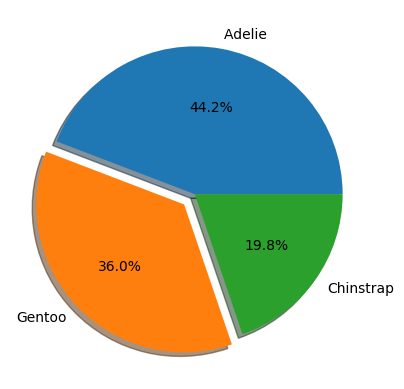

In [ ]:
plt.pie(data['species'].value_counts(),labels=['Adelie ','Gentoo','Chinstrap'],autopct='%1.1f%%',shadow=True,explode=[0,0.1,0])
plt.show()

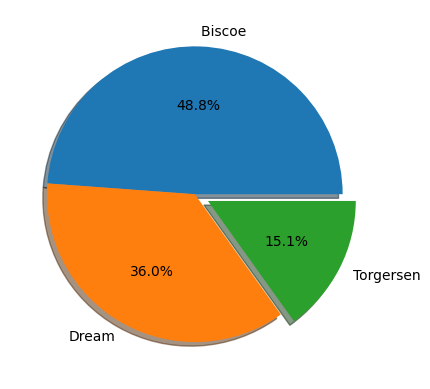

In [ ]:
plt.pie(data['island'].value_counts(),labels=['Biscoe ','Dream','Torgersen'],autopct='%1.1f%%',shadow=True,explode=[0,0,0.1])
plt.show()

#Bi- Variate Analysis

<ipython-input-117-25bc1d3694f1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['culmen_length_mm'])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

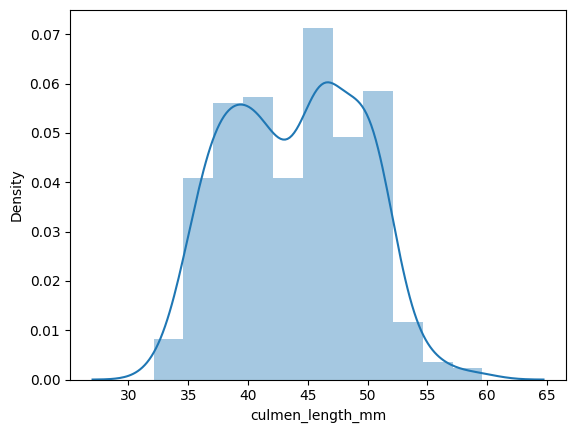

In [ ]:
sns.distplot(data['culmen_length_mm'])

<ipython-input-118-606e706aee24>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['culmen_depth_mm'])


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

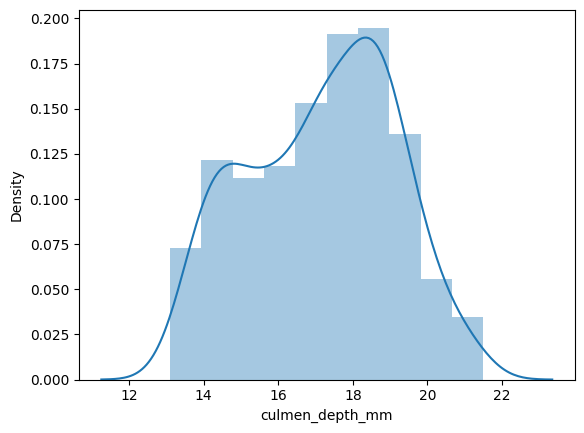

In [ ]:
sns.distplot(data['culmen_depth_mm'])

<ipython-input-119-d0780a77c09a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['flipper_length_mm'])


<Axes: xlabel='flipper_length_mm', ylabel='Density'>

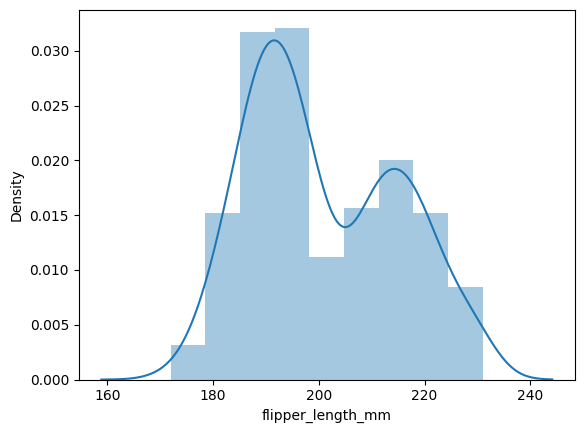

In [ ]:
sns.distplot(data['flipper_length_mm'])

<ipython-input-120-0248c6d7b324>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['body_mass_g'])


<Axes: xlabel='body_mass_g', ylabel='Density'>

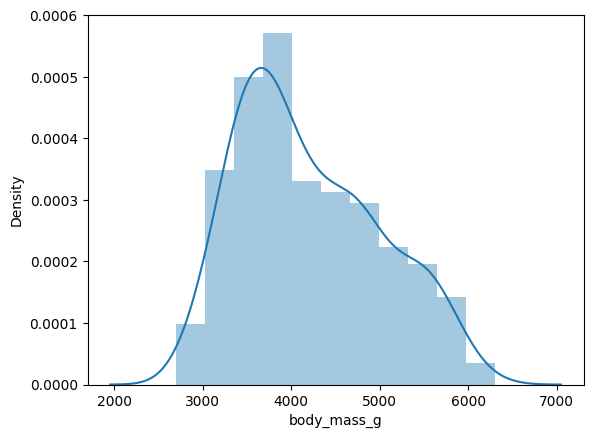

In [ ]:
sns.distplot(data['body_mass_g'])

<Axes: xlabel='culmen_depth_mm', ylabel='species'>

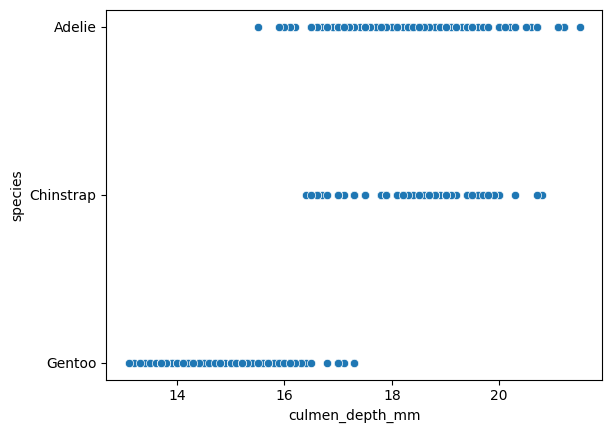

In [ ]:
sns.scatterplot(x=data['culmen_depth_mm'],y=data['species'])

<Axes: xlabel='culmen_depth_mm', ylabel='culmen_length_mm'>

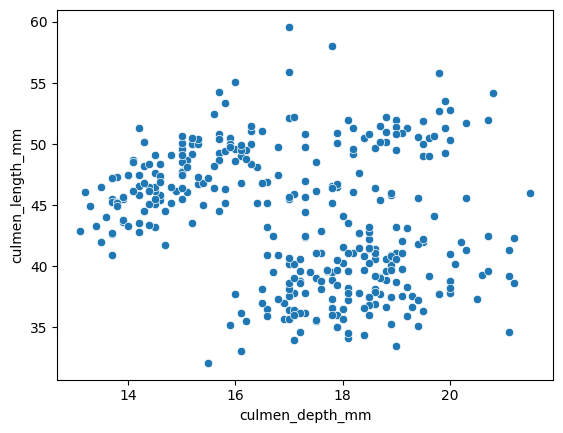

In [ ]:
sns.scatterplot(x=data['culmen_depth_mm'],y=data['culmen_length_mm'])

<Axes: xlabel='flipper_length_mm', ylabel='culmen_length_mm'>

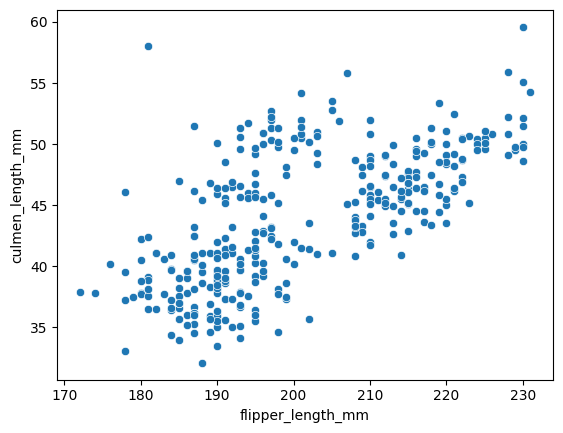

In [ ]:
sns.scatterplot(x=data['flipper_length_mm'],y=data['culmen_length_mm'])

<Axes: xlabel='body_mass_g', ylabel='flipper_length_mm'>

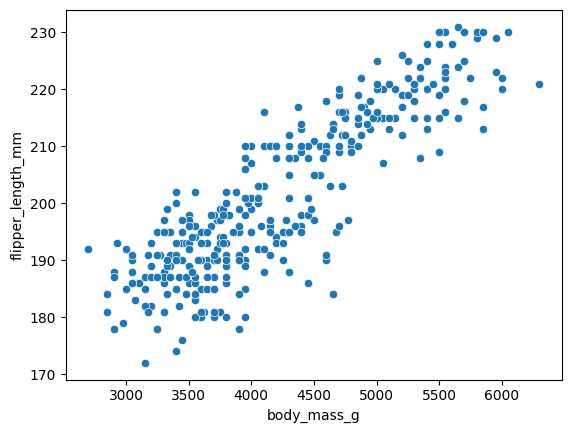

In [ ]:
sns.scatterplot(x=data['body_mass_g'],y=data['flipper_length_mm'])

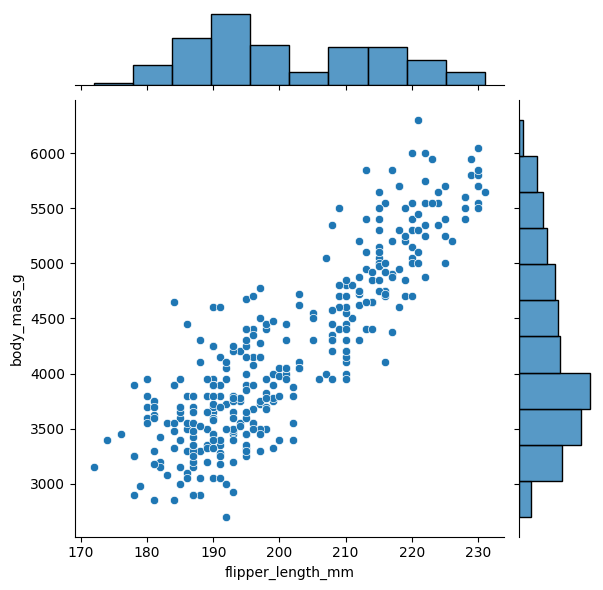

In [ ]:
sns.jointplot(x='flipper_length_mm',y='body_mass_g',data=data)

#Multi-Variate Analysis

<ipython-input-126-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

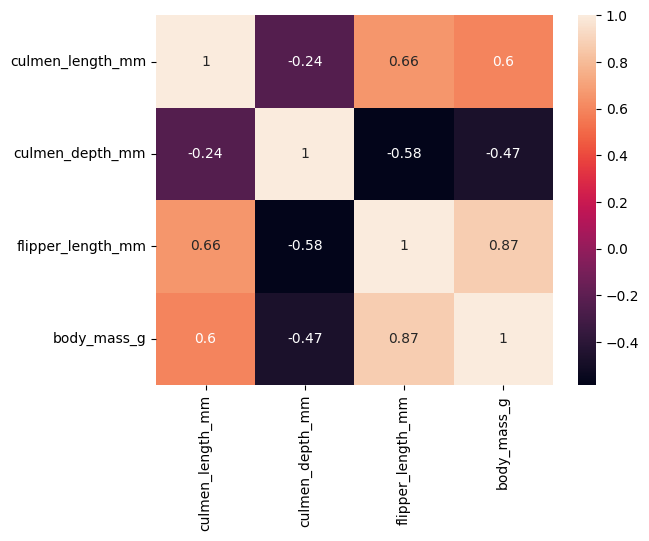

In [ ]:
sns.heatmap(data.corr(),annot=True)

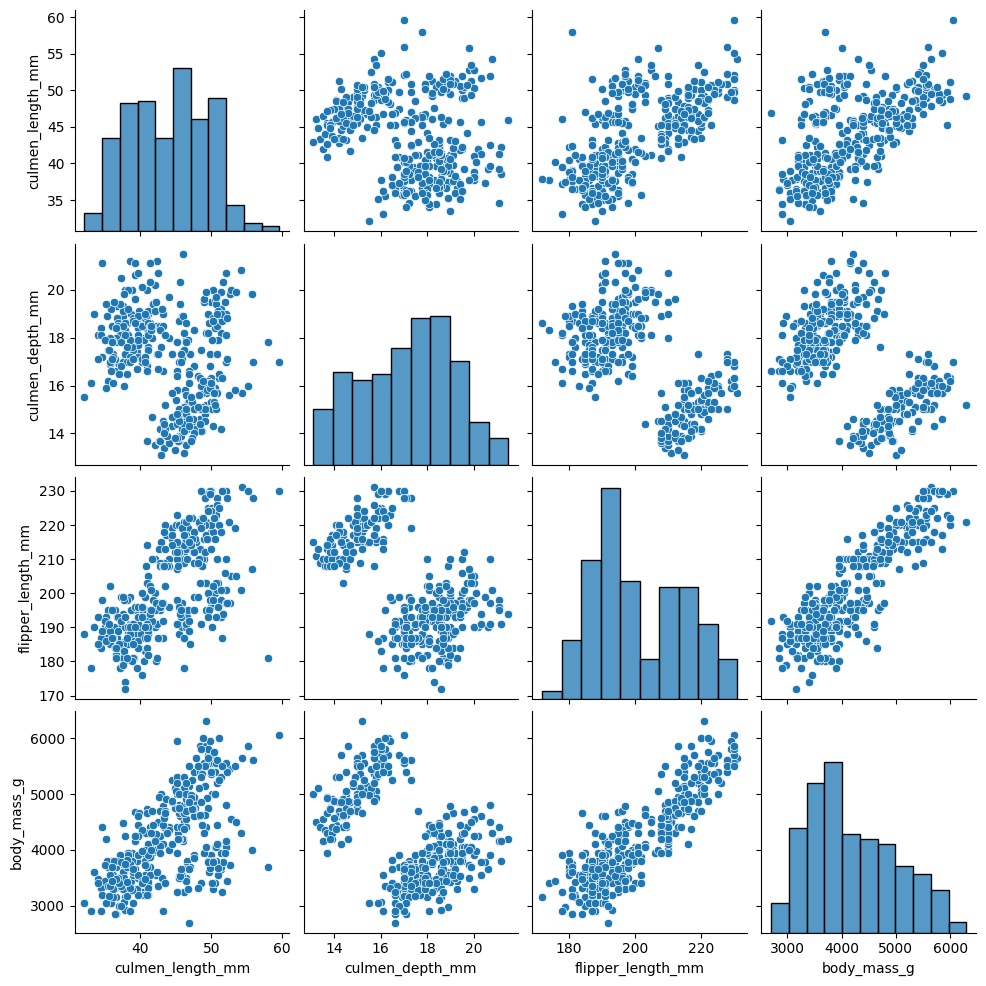

In [ ]:
sns.pairplot(data)

#Task 4. Perform descriptive statistics on the dataset

In [ ]:
data.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#Task 5. Check for Missing values and deal with them.

In [ ]:
data.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
data['culmen_length_mm'] = data['culmen_length_mm'].fillna(data['culmen_length_mm'].median())

In [ ]:
data['culmen_depth_mm'] = data['culmen_depth_mm'].fillna(data['culmen_depth_mm'].median())

In [ ]:
data['flipper_length_mm'] = data['flipper_length_mm'].fillna(data['flipper_length_mm'].median())

In [ ]:
data['body_mass_g'] = data['body_mass_g'].fillna(data['body_mass_g'].median())

In [ ]:
data['sex'] = data['sex'].fillna(data['sex'].mode()[0])

In [ ]:
data['sex'] = np.where(data['sex'] == '.',data['sex'].mode()[0],data['sex'])

#Task 7.Check the correlation of independent variables with the target

In [ ]:
data.corr().species.sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.850819
body_mass_g          0.747547
culmen_length_mm     0.728706
sex                  0.010240
island              -0.635659
culmen_depth_mm     -0.741282
Name: species, dtype: float64

#Task 8. Check for Categorical columns and perform encoding.

In [ ]:
label = LabelEncoder()
data['island'] = label.fit_transform(data['island'])

In [ ]:
data['species'] = label.fit_transform(data['species'])
data['sex'] = label.fit_transform(data['sex'])

In [ ]:
data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,1
1,0,2,39.50,17.4,186.0,3800.0,0
2,0,2,40.30,18.0,195.0,3250.0,0
3,0,2,44.45,17.3,197.0,4050.0,1
4,0,2,36.70,19.3,193.0,3450.0,0


#Task 9. Split the data into dependent and independent variables.

In [ ]:
y = data['species']
x = data.drop(columns=['species'],axis=1)

In [ ]:
y = label.fit_transform(y)

In [ ]:
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,1
1,2,39.50,17.4,186.0,3800.0,0
2,2,40.30,18.0,195.0,3250.0,0
3,2,44.45,17.3,197.0,4050.0,1
4,2,36.70,19.3,193.0,3450.0,0


#Task 10. Scaling the data

In [ ]:
scale = MinMaxScaler()
x_scaled = pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [ ]:
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.0
2,1.0,0.298182,0.583333,0.389831,0.152778,0.0
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.0


#Task 11. Split the data into training and testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

#Task 12.check the training and testing data shape

In [ ]:
x_train.shape

(275, 6)

In [ ]:
y_train.shape

(275,)

In [ ]:
y_test.shape

(69,)

In [ ]:
x_test.shape

(69, 6)

#Deploying a Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 1, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 2,
       2, 0, 2, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 2,
       0, 2, 2])

In [ ]:
output = pd.DataFrame({'Actual':y_test,'Pred':y_pred})
output.head()

,Actual,Pred
0,0,0
1,0,0
2,0,0
3,2,2
4,0,0


#Perfomance Metrics of the Model

In [ ]:
from sklearn import metrics

In [ ]:
r2 = metrics.r2_score(y_test,y_pred)
r2

1.0

In [ ]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.0

In [ ]:
y_t_pred = model.predict(x_train)

In [ ]:
print(metrics.r2_score(y_train,y_t_pred))

0.9629092625687021
